# An example using Feature weighted ECM clustering


In [27]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [28]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")

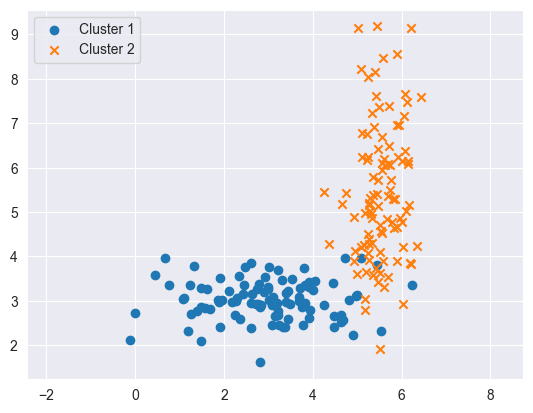

In [29]:
## Generating data set
# Number of samples in the cluster
num_samples = 100

# Mean and covariance for the cluster
mean = [3, 3]
covariance1 = [[2, 0],
               [0, 0.2]]  # Wider along x-axis, narrower along y-axis
cluster1 = np.random.multivariate_normal(mean, covariance1, num_samples)
cluster1 = np.c_[cluster1, np.zeros((cluster1.shape[0], 1))]

mean = [5.5, 5.5]
covariance2 = [[0.2, 0],
               [0, 2]]  # Wider along y-axis, narrower along x-axis
cluster2 = np.random.multivariate_normal(mean, covariance2, num_samples)
cluster2 = np.c_[cluster2, np.ones((cluster2.shape[0], 1))]

dataset = np.vstack([cluster1, cluster2])
df = pd.DataFrame(data=dataset[:, :-1], columns=['X-axis', 'Y-axis'])
plt.scatter(cluster1[:, 0], cluster1[:, 1], marker='o', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], marker='x', label='Cluster 2')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('2D Dataset with two clusters - Wide x-Axis, Narrow y-Axis')
plt.legend()
plt.axis('equal')
plt.show()

[1, 254.3381016665741]
[2, 249.71156535802436]
[3, 248.5667114177778]
[4, 248.09749407962465]
[5, 247.85515769142555]
[6, 247.72200878535816]
[7, 247.64780062702258]
[8, 247.6062789748189]
[9, 247.58300970461104]
[10, 247.56995934325906]
[11, 247.56263832149742]
[12, 247.55853219299937]
[13, 247.5562307469056]
[14, 247.55494236328184]
[15, 247.55422244235376]
[  0.         247.55422244 247.55422244]
[1, 254.3381016665741]
[2, 249.71156535802436]
[3, 248.5667114177778]
[4, 248.09749407962465]
[5, 247.85515769142555]
[6, 247.72200878535816]
[7, 247.64780062702258]
[8, 247.6062789748189]
[9, 247.58300970461104]
[10, 247.56995934325906]
[11, 247.56263832149742]
[12, 247.55853219299937]
[13, 247.5562307469056]
[14, 247.55494236328184]
[15, 247.55422244235376]
[  1.         247.55422244 247.55422244]
[1, 254.3381016665741]
[2, 249.71156535802436]
[3, 248.5667114177778]
[4, 248.09749407962465]
[5, 247.85515769142555]
[6, 247.72200878535816]
[7, 247.64780062702258]
[8, 247.6062789748189]
[9, 2

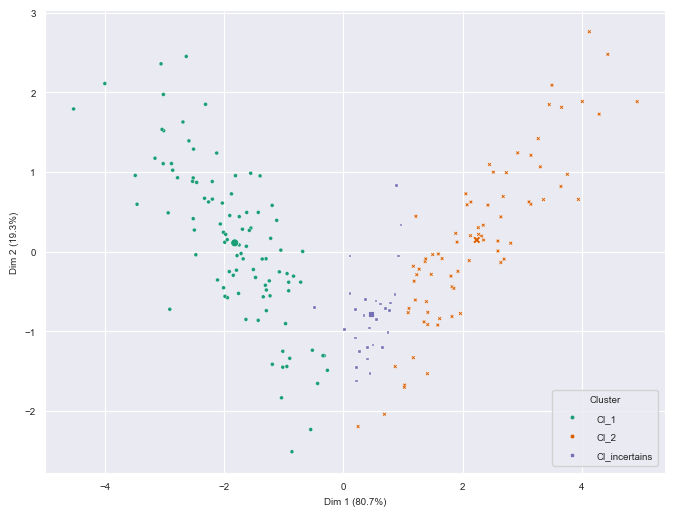

Adjusted Rand Index (ARI): 0.7910526382242649
Silhouette Index (SI): 0.5292507231142364
Maximum Non-specificity value: 2.939574997215275
Minimum Non-specificity value: 0.003237951054217615
Average Non-specificity value: 0.9094882333081051


In [30]:
# Traditional ECM clustering
model = ecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=5)

# ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

true_labels = dataset[:, -1]
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Compute the Silhouette Index (SI)
si = silhouette_score(dataset[:, :-1], predicted_labels)
print(f"Silhouette Index (SI): {si}")

# Calculate Non-specificity
calculate_non_specificity(model)

# (Traditional ECM) Hard partition in 2-D without PCA

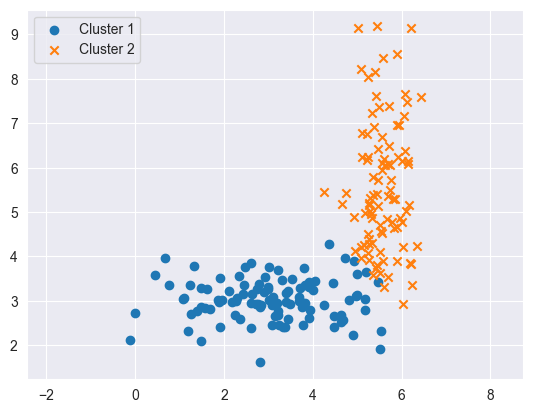

In [31]:
# Hard partition in 2-D without pCA
# 2 dimension plot
predicted_cluster1 = dataset[predicted_labels == 0][:, :-1]
predicted_cluster2 = dataset[predicted_labels == 1][:, :-1]
plt.clf()
plt.scatter(predicted_cluster1[:, 0], predicted_cluster1[:, 1], marker='o', label='Cluster 1')
plt.scatter(predicted_cluster2[:, 0], predicted_cluster2[:, 1], marker='x', label='Cluster 2')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('2D Dataset with two clusters - Wide x-Axis, Narrow y-Axis')
plt.legend()
plt.axis('equal')
plt.show()

[1, 25.435825094999867]
[2, 22.799573833351484]
[3, 22.642934660277074]
[4, 22.629482595351902]
[5, 22.6253067831851]
[6, 22.623307797760702]
[7, 22.622252846789763]
[8, 22.621720309715702]
[ 0.         22.62172031 22.62172031]
[1, 28.046697054696498]
[2, 22.888825619978896]
[3, 22.703343024914446]
[4, 22.670274930622185]
[5, 22.661896238612336]
[6, 22.659382865600644]
[7, 22.658306203875625]
[8, 22.657338026811733]
[ 1.         22.65733803 22.62172031]
[1, 34.0346020819938]
[2, 24.36127430106994]
[3, 23.092570167493783]
[4, 22.808523071799403]
[5, 22.743783114126014]
[6, 22.722137420622932]
[7, 22.708900609667737]
[8, 22.69859496237287]
[9, 22.690866957967256]
[10, 22.68516850683409]
[11, 22.68098454576058]
[12, 22.6778740338055]
[13, 22.675492902397465]
[14, 22.67359232437954]
[15, 22.671061871455628]
[16, 22.669683912799332]
[17, 22.668439676954137]
[18, 22.667291667539224]
[19, 22.666211193244585]
[20, 22.665181803945664]
[21, 22.664194073706526]
[ 2.         22.66419407 22.6217203

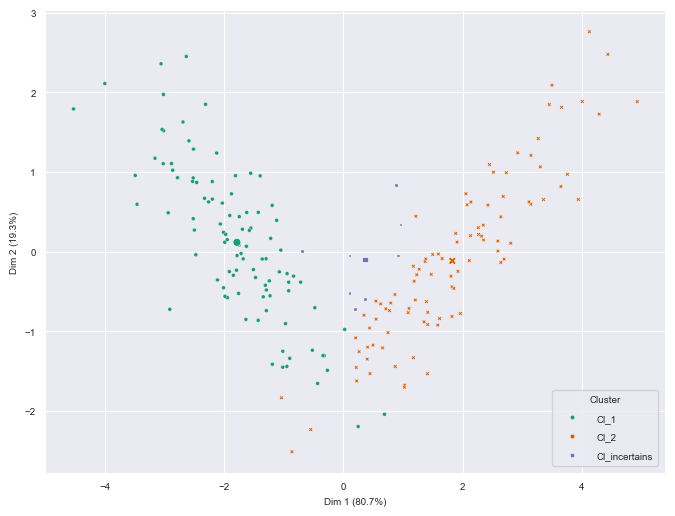

Adjusted Rand Index (ARI): 0.8272319054384316 - J value: 22.621720309715702
Silhouette Index (SI): 0.5215013440660587
Maximum Non-specificity value: 2.993234201785429
Minimum Non-specificity value: 0.00021538877714813746
Average Non-specificity value: 0.7084950528538195


In [32]:
# Feature weighted ECM clustering
model = fwecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=5)

# ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1]
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Compute the Silhouette Index (SI)
si = silhouette_score(dataset[:, :-1], predicted_labels)
print(f"Silhouette Index (SI): {si}")

# Calculate Non-specificity
calculate_non_specificity(model)

# (Weighted ECM) Hard partition in 2-D without PCA

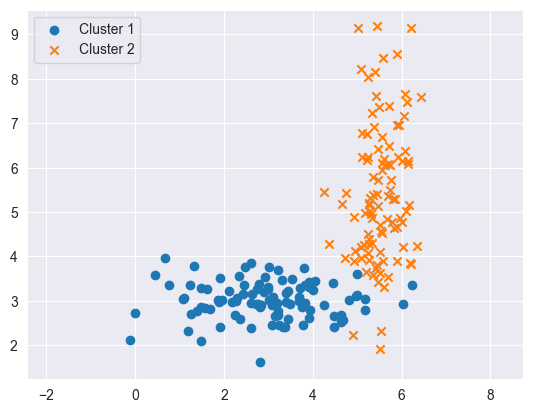

In [33]:
# Hard partition in 2-D without PCA
# 2 dimension plot
predicted_cluster1 = dataset[predicted_labels == 0][:, :-1]
predicted_cluster2 = dataset[predicted_labels == 1][:, :-1]
plt.clf()
plt.scatter(predicted_cluster1[:, 0], predicted_cluster1[:, 1], marker='o', label='Cluster 1')
plt.scatter(predicted_cluster2[:, 0], predicted_cluster2[:, 1], marker='x', label='Cluster 2')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('2D Dataset with two clusters - Wide x-Axis, Narrow y-Axis')
plt.legend()
plt.axis('equal')
plt.show()